In [1]:
# Data: https://www.kaggle.com/ash316/terrorism-around-the-world/data
# Credits: https://www.kaggle.com/ash316/terrorism-around-the-world

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output


In [8]:
terror=pd.read_csv('globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)


/Users/deepak/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [43]:
terror.shape

(170350, 18)

In [11]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              446
latitude         4606
longitude        4606
AttackType          0
Killed           9682
Wounded         15325
Target            634
Summary         66138
Group               0
Target_type         0
Weapon_type         0
Motive         121764
casualities     15826
dtype: int64

In [44]:
(terror.dtypes)

Year             int64
Month            int64
Day              int64
Country         object
Region          object
city            object
latitude       float64
longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
Motive          object
casualities    float64
dtype: object

In [46]:
terror.nunique()

Year               46
Month              13
Day                32
Country           205
Region             12
city            33957
latitude        61028
longitude       60602
AttackType          9
Killed            199
Wounded           233
Target          82975
Summary        101538
Group            3454
Target_type        22
Weapon_type        12
Motive          13033
casualities       336
dtype: int64

In [23]:
terror["city"].value_counts()[0:5]

Unknown    9162
Baghdad    7206
Karachi    2609
Lima       2358
Belfast    2140
Name: city, dtype: int64

In [15]:
terror["Country"].value_counts()[0:5]

Iraq           22130
Pakistan       13634
Afghanistan    11306
India          10978
Colombia        8163
Name: Country, dtype: int64

In [19]:
terror["Year"].value_counts()[0:5]

2014    16860
2015    14852
2016    13488
2013    11996
2012     8500
Name: Year, dtype: int64

In [20]:
terror["Region"].value_counts()[0:5]

Middle East & North Africa    46511
South Asia                    41497
South America                 18762
Western Europe                16307
Sub-Saharan Africa            15491
Name: Region, dtype: int64

In [21]:
terror['Killed'].value_counts()[0:5]

0.0    82925
1.0    34256
2.0    13247
3.0     7170
4.0     4580
5.0     3306
Name: Killed, dtype: int64

In [18]:
terror["Country"].value_counts()[-5:-1]

North Korea          1
New Hebrides         1
Brunei               1
Wallis and Futuna    1
Name: Country, dtype: int64

In [12]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1500.0 that took place in Iraq


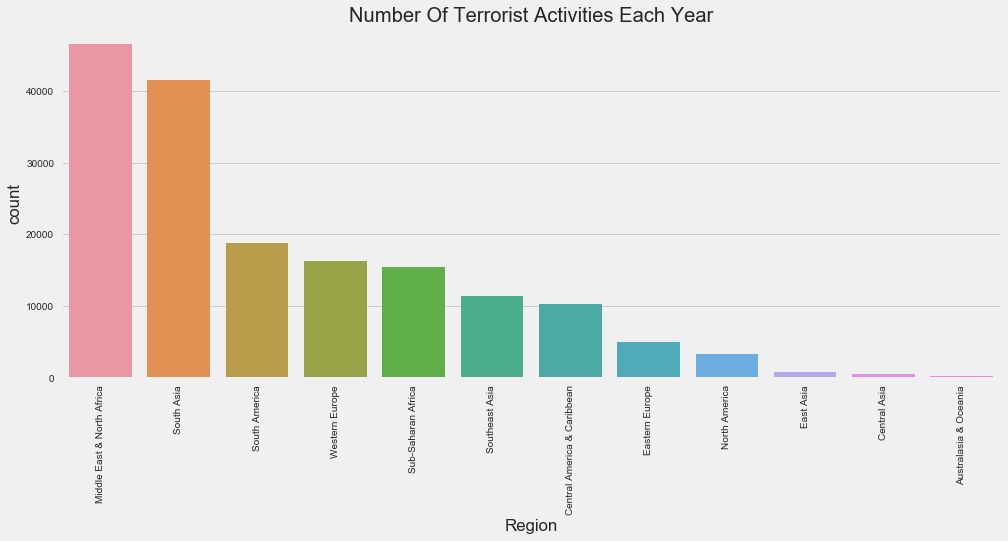

In [49]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

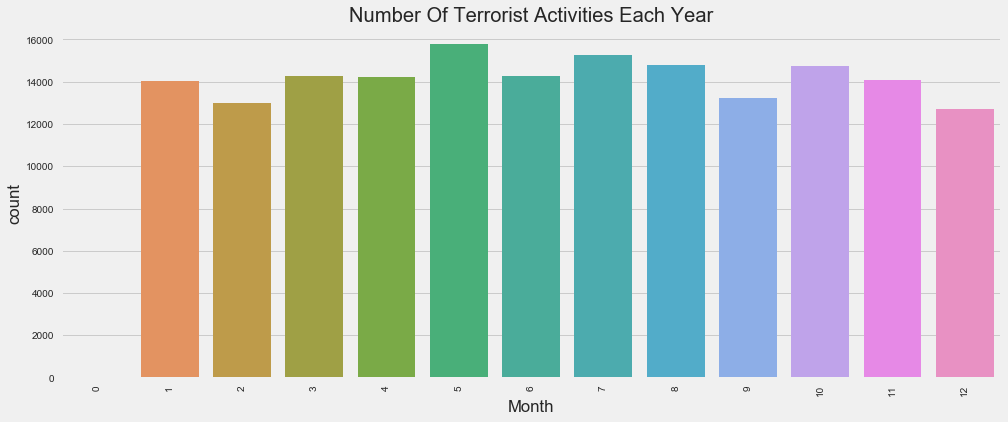

In [47]:
plt.subplots(figsize=(15,6))
sns.countplot('Month',data=terror)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

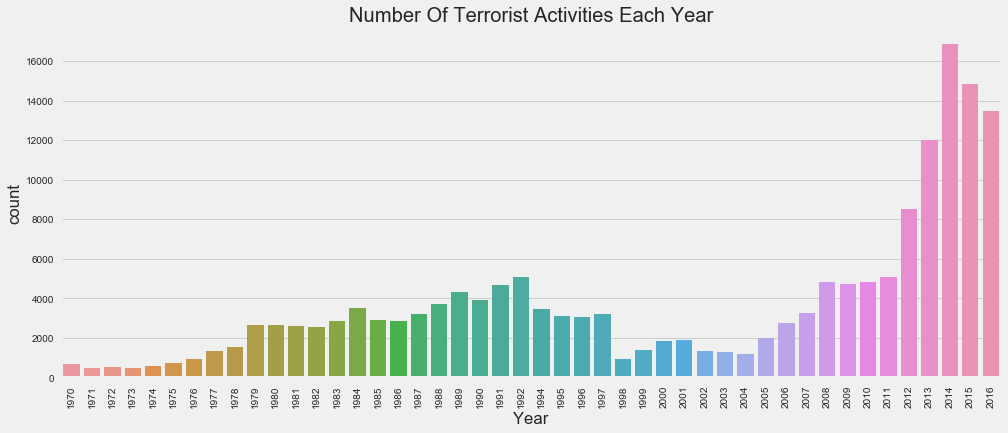

In [38]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

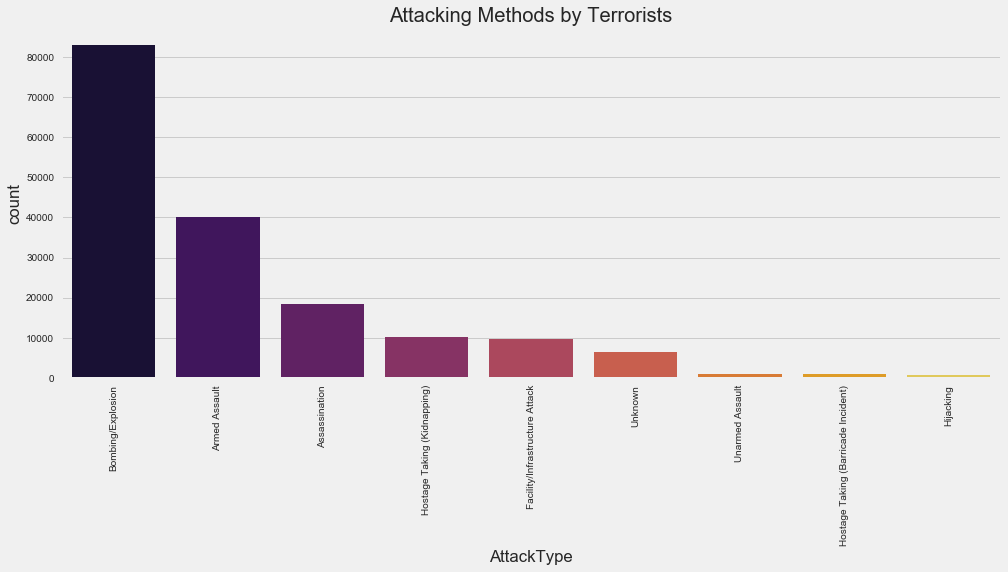

In [29]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

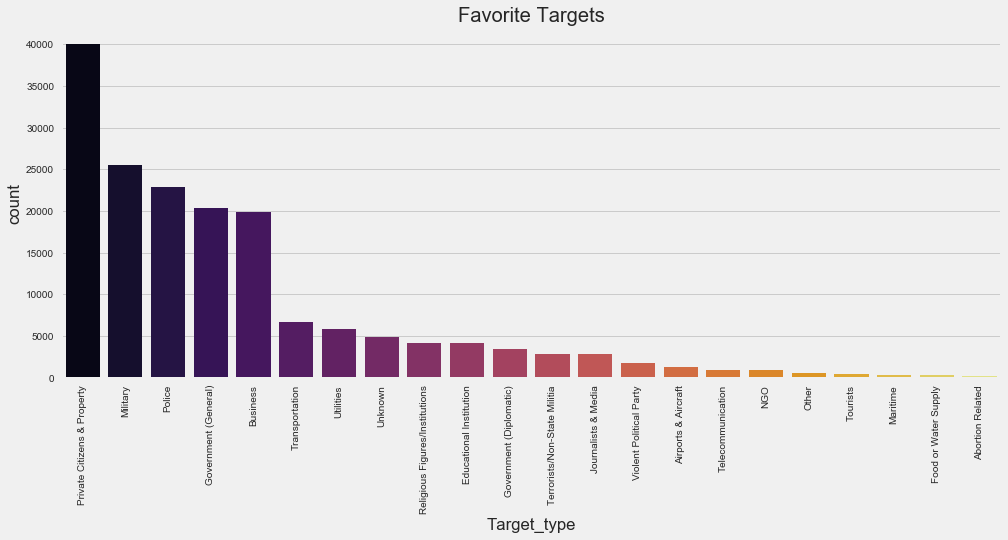

In [30]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

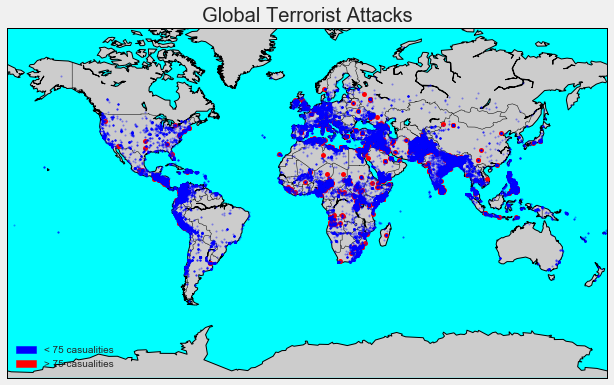

In [33]:
m3 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c',lat_0=True,lat_1=True)
lat_100=list(terror[terror['casualities']>=75].latitude)
long_100=list(terror[terror['casualities']>=75].longitude)
x_100,y_100=m3(long_100,lat_100)
m3.plot(x_100, y_100,'go',markersize=5,color = 'r')
lat_=list(terror[terror['casualities']<75].latitude)
long_=list(terror[terror['casualities']<75].longitude)
x_,y_=m3(long_,lat_)
m3.plot(x_, y_,'go',markersize=2,color = 'b',alpha=0.4)
m3.drawcoastlines()
m3.drawcountries()
m3.fillcontinents(lake_color='aqua')
m3.drawmapboundary(fill_color='aqua')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.title('Global Terrorist Attacks')
plt.legend(loc='lower left',handles=[mpatches.Patch(color='b', label = "< 75 casualities"),
                    mpatches.Patch(color='red',label='> 75 casualities')])
plt.show()

## terror acts for various years

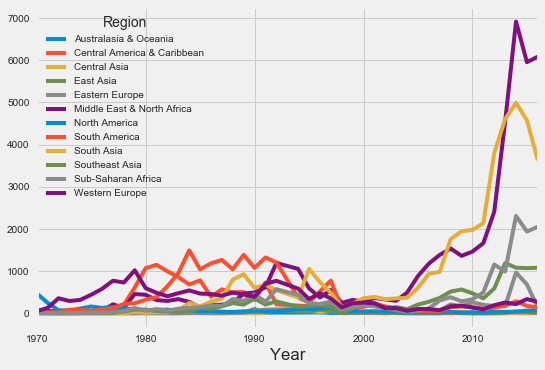

In [67]:
terror_region=pd.crosstab(terror.Year,terror.Region)
plt.figure(figsize=(15,6))
terror_region.plot()
plt.show()

## AttackType vs Region

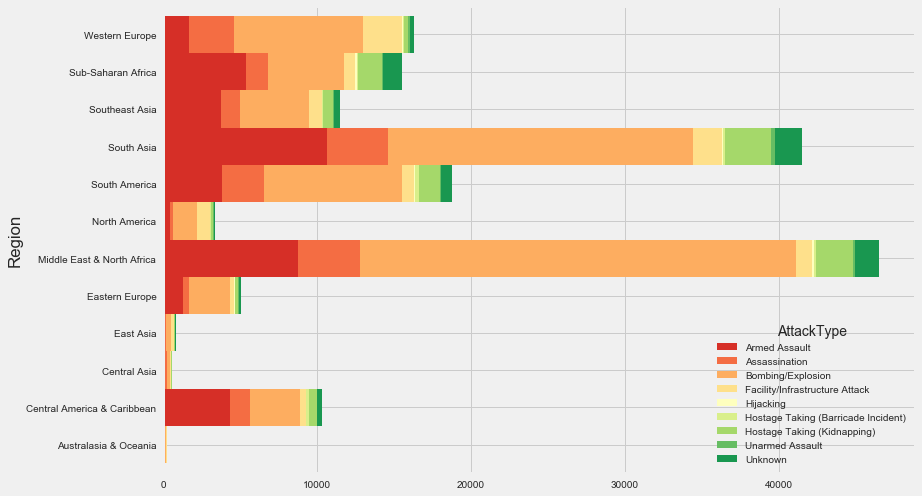

In [52]:
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

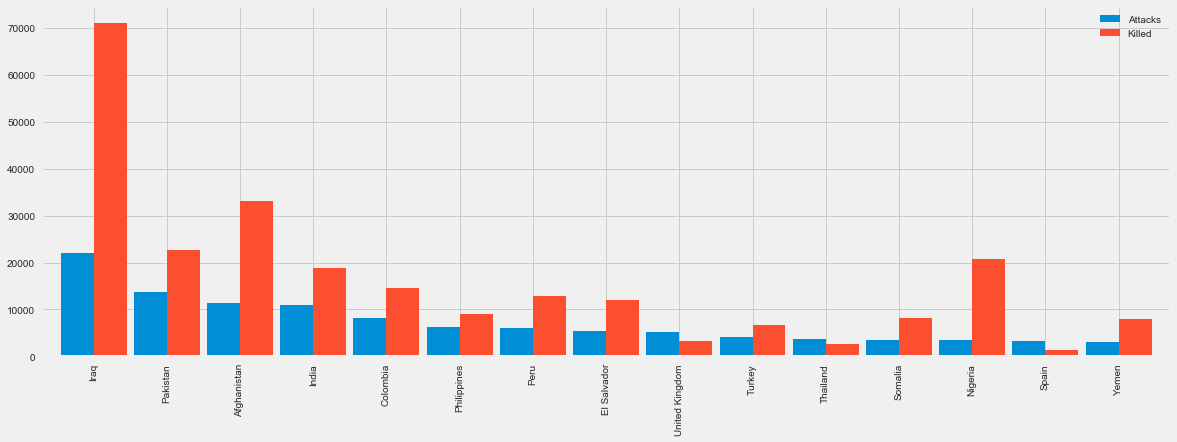

In [69]:
coun_terror=terror['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()